In [ ]:
# !pip install keras
# !pip install mnist

In [ ]:
import numpy as np
from keras.utils import to_categorical
from keras.layers import Dense
from keras import Sequential
import tensorflow as tf

import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

#### Описание таргета 

*   0 - Футболки/сверху
*   1 - Брюки (брюки)
*   2 - Пуловер (пуловер)
*   3 -	Платье
*   4 -	Пальто
*   5 -	Сандали
*   6 -	Рубашка
*   7 -	Тапки (кроссовки)
*   8 -	Сумка
*   9 -	Ботильоны


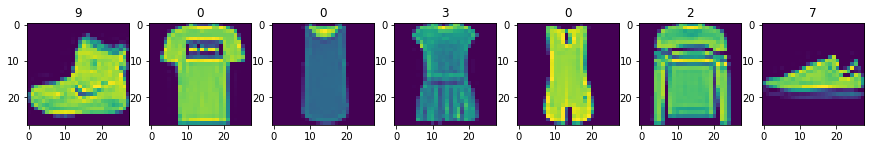

In [ ]:
n = 7
fig, axes = plt.subplots(1, n)
for i in range(n):
    axes[i].imshow(X_train[i])
    axes[i].set_title(y_train[i])

fig.set_figheight(15)
fig.set_figwidth(15)

plt.show()

In [ ]:
# Нормализация признаков
def norm(X):
    return (X / 255 - 0.5)

X_train_norm = norm(X_train)
X_test_norm = norm(X_test)

# преобразование признаков
train = X_train_norm.reshape((-1, 784))
test = X_test_norm.reshape((-1, 784))

## Зависимость качества модели при одинаковом количестве параметров и разном количестве слоев.

### 2 слоя

In [ ]:
tf.random.set_seed(42)

model_2_layers = Sequential([
    Dense(80, activation='tanh', input_shape=(784,)),
    Dense(10, activation='softmax'),
], name="mnist")

print(f'Количество параметров модели = {model_2_layers.count_params()}')


model_2_layers.compile(optimizer=tf.optimizers.Adam(), 
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

Количество параметров модели = 63610


In [ ]:
model_2_layers.fit(train,
                   to_categorical(y_train),
                   batch_size=128,
                   epochs=30,
                   validation_split=0.2,
                   callbacks=[
                       tf.keras.callbacks.EarlyStopping(restore_best_weights=True, mode='auto', patience=5, min_delta=0.002),
                       tf.keras.callbacks.ReduceLROnPlateau(factor=0.9, patience=0, cooldown=1)
                       ]
                   )

Epoch 1/30
375/375 [==============================] - 2s 5ms/step - loss: 0.5739 - accuracy: 0.7992 - val_loss: 0.4571 - val_accuracy: 0.8348 - lr: 0.0010
Epoch 2/30
375/375 [==============================] - 2s 4ms/step - loss: 0.4167 - accuracy: 0.8516 - val_loss: 0.4104 - val_accuracy: 0.8500 - lr: 0.0010
Epoch 3/30
375/375 [==============================] - 2s 4ms/step - loss: 0.3799 - accuracy: 0.8645 - val_loss: 0.3780 - val_accuracy: 0.8653 - lr: 0.0010
Epoch 4/30
375/375 [==============================] - 2s 4ms/step - loss: 0.3533 - accuracy: 0.8735 - val_loss: 0.3636 - val_accuracy: 0.8666 - lr: 0.0010
Epoch 5/30
375/375 [==============================] - 2s 5ms/step - loss: 0.3358 - accuracy: 0.8789 - val_loss: 0.3548 - val_accuracy: 0.8708 - lr: 0.0010
Epoch 6/30
375/375 [==============================] - 2s 5ms/step - loss: 0.3204 - accuracy: 0.8844 - val_loss: 0.3458 - val_accuracy: 0.8767 - lr: 0.0010
Epoch 7/30
375/375 [==============================] - 2s 5ms/step - lo

In [ ]:
# точность на тесте
y_pred = np.argmax(model_2_layers.predict(test, verbose=0), axis=1)
print(f'Точность на тесте = {np.round((y_pred == y_test).sum() / y_test.shape[0], 3)}')

Точность на тесте = 0.88


### 3 Слоя

In [ ]:
tf.random.set_seed(42)

model_3_layers = Sequential([
    Dense(73, activation='tanh', input_shape=(784,)),
    Dense(75, activation=tf.keras.layers.LeakyReLU(alpha=0.05)),
    Dense(10, activation='softmax'),
], name="mnist")

print(f'Количество параметров модели = {model_3_layers.count_params()}')


model_3_layers.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Количество параметров модели = 63615


In [ ]:
model_3_layers.fit(train,
                   to_categorical(y_train),
                   batch_size=128,
                   epochs=30,
                   validation_split=0.2,
                   callbacks=[
                       tf.keras.callbacks.EarlyStopping(restore_best_weights=True, mode='auto', patience=5, min_delta=0.002),
                       tf.keras.callbacks.ReduceLROnPlateau(factor=0.9, patience=0, cooldown=1)
                       ]
                   )

Epoch 1/30
375/375 [==============================] - 3s 6ms/step - loss: 0.5753 - accuracy: 0.7969 - val_loss: 0.4338 - val_accuracy: 0.8394 - lr: 0.0010
Epoch 2/30
375/375 [==============================] - 2s 6ms/step - loss: 0.3968 - accuracy: 0.8561 - val_loss: 0.3944 - val_accuracy: 0.8575 - lr: 0.0010
Epoch 3/30
375/375 [==============================] - 2s 6ms/step - loss: 0.3586 - accuracy: 0.8687 - val_loss: 0.3739 - val_accuracy: 0.8637 - lr: 0.0010
Epoch 4/30
375/375 [==============================] - 2s 6ms/step - loss: 0.3343 - accuracy: 0.8782 - val_loss: 0.3480 - val_accuracy: 0.8716 - lr: 0.0010
Epoch 5/30
375/375 [==============================] - 2s 6ms/step - loss: 0.3149 - accuracy: 0.8838 - val_loss: 0.3516 - val_accuracy: 0.8737 - lr: 0.0010
Epoch 6/30
375/375 [==============================] - 2s 6ms/step - loss: 0.2983 - accuracy: 0.8901 - val_loss: 0.3328 - val_accuracy: 0.8778 - lr: 9.0000e-04
Epoch 7/30
375/375 [==============================] - 2s 5ms/step 

In [ ]:
# точность на тесте
y_pred = np.argmax(model_3_layers.predict(test, verbose=0), axis=1)
print(f'Точность на тесте = {np.round((y_pred == y_test).sum() / y_test.shape[0], 3)}')

Точность на тесте = 0.885


### 5 Слоев

In [ ]:
tf.random.set_seed(42)

model_5_layers = Sequential([
    Dense(64, activation='tanh', input_shape=(784,)),
    Dense(72, activation='tanh'),
    Dense(51, activation=tf.keras.layers.LeakyReLU(alpha=0.05)),
    Dense(80, activation='tanh'),
    Dense(10, activation='softmax'),
], name="mnist")

print(f'Количество параметров модели = {model_5_layers.count_params()}')


model_5_layers.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Количество параметров модели = 63613


In [ ]:
model_5_layers.fit(train, to_categorical(y_train),
                   batch_size=100,
                   epochs=30,
                   validation_split=0.2,
                   callbacks=[
                       tf.keras.callbacks.EarlyStopping(restore_best_weights=True, mode='auto', patience=5, min_delta=0.002),
                       tf.keras.callbacks.ReduceLROnPlateau(factor=0.9, patience=0, cooldown=1)
                       ]
                   )

Epoch 1/30
480/480 [==============================] - 4s 6ms/step - loss: 0.5704 - accuracy: 0.7973 - val_loss: 0.4762 - val_accuracy: 0.8245 - lr: 0.0010
Epoch 2/30
480/480 [==============================] - 3s 6ms/step - loss: 0.4005 - accuracy: 0.8537 - val_loss: 0.3936 - val_accuracy: 0.8550 - lr: 0.0010
Epoch 3/30
480/480 [==============================] - 3s 6ms/step - loss: 0.3585 - accuracy: 0.8681 - val_loss: 0.3675 - val_accuracy: 0.8663 - lr: 0.0010
Epoch 4/30
480/480 [==============================] - 3s 5ms/step - loss: 0.3357 - accuracy: 0.8768 - val_loss: 0.3584 - val_accuracy: 0.8702 - lr: 0.0010
Epoch 5/30
480/480 [==============================] - 2s 5ms/step - loss: 0.3143 - accuracy: 0.8846 - val_loss: 0.3841 - val_accuracy: 0.8623 - lr: 0.0010
Epoch 6/30
480/480 [==============================] - 2s 5ms/step - loss: 0.2953 - accuracy: 0.8918 - val_loss: 0.3336 - val_accuracy: 0.8789 - lr: 9.0000e-04
Epoch 7/30
480/480 [==============================] - 2s 5ms/step 

In [ ]:
# точность на тесте
y_pred = np.argmax(model_5_layers.predict(test, verbose=0), axis=1)
print(f'Точность на тесте = {np.round((y_pred == y_test).sum() / y_test.shape[0], 3)}')

Точность на тесте = 0.878


### 10 Слоев

In [ ]:
tf.random.set_seed(42)

model_10_layers = Sequential([
    Dense(52, activation='tanh', input_shape=(784,)),
    Dense(52, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
    Dense(52, activation='tanh'),
    Dense(52, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
    Dense(52, activation='tanh'),
    Dense(52, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
    Dense(52, activation='tanh'),
    Dense(52, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
    Dense(52, activation='tanh'),
    Dense(10, activation='softmax'),
], name="mnist")

print(f'Количество параметров модели = {model_10_layers.count_params()}')


model_10_layers.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Количество параметров модели = 63398


In [ ]:
model_10_layers.fit(train, to_categorical(y_train),
                   batch_size=100,
                   epochs=30,
                   validation_split=0.2,
                   callbacks=[
                       tf.keras.callbacks.EarlyStopping(restore_best_weights=True, mode='auto', patience=5, min_delta=0.002),
                       tf.keras.callbacks.ReduceLROnPlateau(factor=0.9, patience=0, cooldown=1)
                       ]
                   )

Epoch 1/30
480/480 [==============================] - 4s 6ms/step - loss: 0.6568 - accuracy: 0.7674 - val_loss: 0.4796 - val_accuracy: 0.8317 - lr: 0.0010
Epoch 2/30
480/480 [==============================] - 3s 6ms/step - loss: 0.4374 - accuracy: 0.8455 - val_loss: 0.4286 - val_accuracy: 0.8438 - lr: 0.0010
Epoch 3/30
480/480 [==============================] - 3s 6ms/step - loss: 0.3906 - accuracy: 0.8623 - val_loss: 0.3916 - val_accuracy: 0.8631 - lr: 0.0010
Epoch 4/30
480/480 [==============================] - 3s 6ms/step - loss: 0.3663 - accuracy: 0.8693 - val_loss: 0.3918 - val_accuracy: 0.8598 - lr: 0.0010
Epoch 5/30
480/480 [==============================] - 3s 6ms/step - loss: 0.3390 - accuracy: 0.8784 - val_loss: 0.3813 - val_accuracy: 0.8648 - lr: 9.0000e-04
Epoch 6/30
480/480 [==============================] - 3s 6ms/step - loss: 0.3235 - accuracy: 0.8836 - val_loss: 0.3593 - val_accuracy: 0.8697 - lr: 9.0000e-04
Epoch 7/30
480/480 [==============================] - 3s 6ms/s

In [ ]:
print(f'Точность на тесте = {np.round(model_10_layers.evaluate(test, to_categorical(y_test), verbose=0)[1], 3)}')

Точность на тесте = 0.879


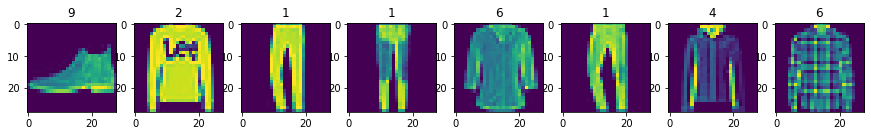

In [ ]:
fig, axes = plt.subplots(1, 8)

for i in range(8):
    axes[i].imshow(X_test[i])
    axes[i].set_title(y_pred[i])

fig.set_figheight(15)
fig.set_figwidth(15)
plt.show()

### Вывод
При увеличении числа слоёв, но при одинаковом количестве суммарных параметров(весов) сильных изменений в точности на тестовой выборке не замечено.

## Зависимость модели от количества параметров при постоянном кол-ве слоев

In [ ]:
tf.random.set_seed(42)

n_params = []
accuracy_test = []
accuracy_train = []

for n in range(20, 221, 40):
    model_n = Sequential([
        Dense(n, activation='tanh', input_shape=(784,)),
        Dense(n*0.5, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
        Dense(n*0.2, activation='tanh'),
        Dense(10, activation='softmax'),
    ], name="fashion_mnist")

    print(f'Количество параметров модели = {model_n.count_params()}')


    model_n.compile(optimizer=tf.optimizers.Adam(),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

    model_n.fit(train,
                to_categorical(y_train),
                batch_size=128,
                epochs=30,
                validation_split=0.2,
                callbacks=[
                    tf.keras.callbacks.EarlyStopping(restore_best_weights=True, mode='auto', patience=5, min_delta=0.002),
                    tf.keras.callbacks.ReduceLROnPlateau(factor=0.8, patience=0, cooldown=1)
                    ],
                verbose=0
                )
    
    n_params.append(model_n.count_params()),
    accuracy_train.append(model_n.evaluate(train, to_categorical(y_train))[1])
    accuracy_test.append(model_n.evaluate(test, to_categorical(y_test))[1])


Количество параметров модели = 16004
313/313 [==============================] - 1s 2ms/step - loss: 0.4278 - accuracy: 0.8603
Количество параметров модели = 49432
313/313 [==============================] - 1s 2ms/step - loss: 0.3644 - accuracy: 0.8763
Количество параметров модели = 84780
313/313 [==============================] - 1s 2ms/step - loss: 0.3372 - accuracy: 0.8844
Количество параметров модели = 122048
313/313 [==============================] - 1s 2ms/step - loss: 0.3408 - accuracy: 0.8821
Количество параметров модели = 161236
313/313 [==============================] - 1s 2ms/step - loss: 0.3235 - accuracy: 0.8881
Количество параметров модели = 202344
313/313 [==============================] - 1s 2ms/step - loss: 0.3222 - accuracy: 0.8867


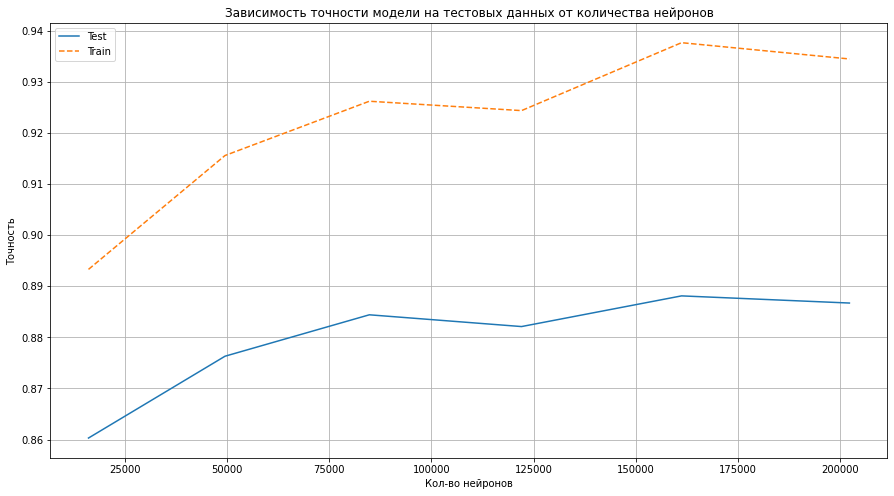

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(n_params, accuracy_test, label='Test')
plt.plot(n_params, accuracy_train, '--', label='Train')
plt.title('Зависимость точности модели на тестовых данных от количества нейронов')
plt.ylabel('Точность')
plt.xlabel('Кол-во нейронов')
plt.grid()
plt.legend()
plt.show()

###Вывод
Наблюдается более резкое увеличение метрики до 80 нейронов, а потом точность модели на тестовых данных остается почти одинаковой, а точность на тренировочной выборке продолжается расти (наблюдается небольшое переобучение).

# Финальная модель

In [ ]:
tf.random.set_seed(7)

n = 230

final_model = Sequential([
    Dense(n, activation='tanh', input_shape=(784,)),
    Dense(n, activation=tf.keras.layers.LeakyReLU(alpha=0.05)),
    Dense(10, activation='softmax'),
], name="fashion_mnist")

print(f'Количество параметров модели = {final_model.count_params()}')


final_model.compile(optimizer=tf.optimizers.Nadam(learning_rate=0.0035),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

final_model.fit(train,
            to_categorical(y_train),
            batch_size=1000,
            epochs=100,
            validation_split=0.2,
            callbacks=[
                tf.keras.callbacks.EarlyStopping(restore_best_weights=True, mode='auto', patience=5, min_delta=0.0001),
                tf.keras.callbacks.ReduceLROnPlateau(factor=0.7, patience=0, cooldown=1)
                ],
            verbose=1
            )

print(final_model.evaluate(train, to_categorical(y_train))[1], model_n.evaluate(test, to_categorical(y_test))[1])


Количество параметров модели = 235990
Epoch 1/100
48/48 [==============================] - 3s 43ms/step - loss: 0.8199 - accuracy: 0.6980 - val_loss: 0.5719 - val_accuracy: 0.7874 - lr: 0.0035
Epoch 2/100
48/48 [==============================] - 2s 39ms/step - loss: 0.5264 - accuracy: 0.8068 - val_loss: 0.4505 - val_accuracy: 0.8332 - lr: 0.0035
Epoch 3/100
48/48 [==============================] - 2s 36ms/step - loss: 0.4505 - accuracy: 0.8324 - val_loss: 0.4438 - val_accuracy: 0.8340 - lr: 0.0035
Epoch 4/100
48/48 [==============================] - 2s 37ms/step - loss: 0.3926 - accuracy: 0.8542 - val_loss: 0.3853 - val_accuracy: 0.8588 - lr: 0.0035
Epoch 5/100
48/48 [==============================] - 2s 40ms/step - loss: 0.3738 - accuracy: 0.8589 - val_loss: 0.3785 - val_accuracy: 0.8633 - lr: 0.0035
Epoch 6/100
48/48 [==============================] - 2s 37ms/step - loss: 0.3504 - accuracy: 0.8696 - val_loss: 0.3510 - val_accuracy: 0.8712 - lr: 0.0035
Epoch 7/100
48/48 [=============

### Матрица корреляций

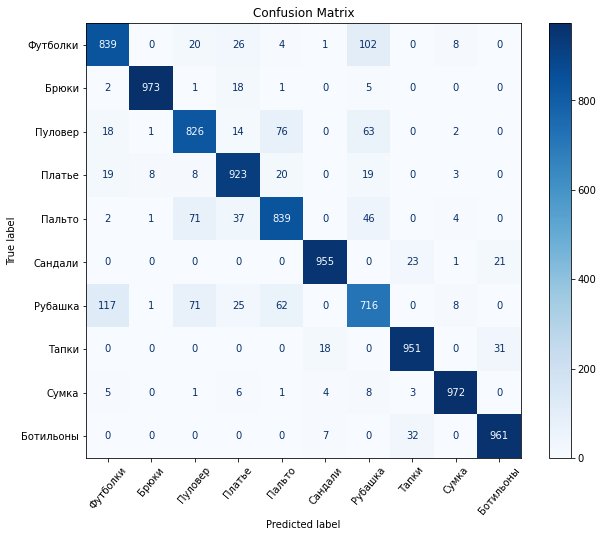

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

class_names = ['Футболки', 'Брюки', 'Пуловер', 'Платье', 'Пальто', 'Сандали', 'Рубашка', 'Тапки', 'Сумка', 'Ботильоны']

plt.figure(figsize=(10, 8))
ax_ = plt.subplot()
y_pred = final_model.predict(test, verbose=0).argmax(axis=1)
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap=plt.cm.Blues, ax=ax_)
ax_.xaxis.set_ticklabels(class_names);
ax_.xaxis.set_tick_params(labelrotation=50.0)
ax_.yaxis.set_ticklabels(class_names);
ax_.set_title('Confusion Matrix')
plt.show()

Из матрицы ошибок видно, что основные промахи модели заключаются в выборе рубашек(6) в сравнении с футболками(0), пуловерами(2) и пальто(4).